<a href="https://colab.research.google.com/github/EddyGiusepe/Perceptron_with_Python/blob/main/The_Multilayer_Perceptron_(MLP)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Multilayer Perceptron (MLP)</h2>



Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Como sabemos o `Perceptron` tem uma grande limitação se nossos Dados não seguem uma linha (Regressão) ou não são Linearmente separáveis (classificação).

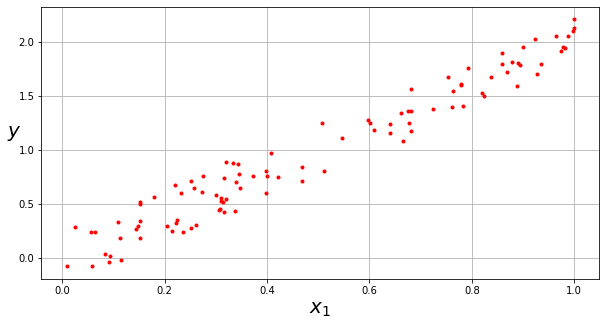

In [3]:
import numpy as np
import matplotlib.pyplot as plt


x = np.random.rand(100)
X = x.reshape(-1, 1)
y = 2*x + (np.random.rand(100)-0.5)*0.5

plt.figure(figsize=(10, 5))
plt.plot(x, y, "r.")
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$y$", rotation=0, fontsize=20)
plt.grid(True)
plt.show()

Lembrando a implementação de nosso `Perceptron` para realizar Regressão Linear.

In [5]:
def linear(x):
    return x

def mse(y, y_hat):
    return 0.5*np.mean((y_hat - y.reshape(y_hat.shape))**2)

def grad_mse(y, y_hat):
    return y_hat - y.reshape(y_hat.shape)



class Perceptron():
  def __init__(self, inputs, outputs, activation, loss, grad_loss):
    inputs = inputs + 1
    self.w = np.random.normal(loc=0.0, 
          scale = np.sqrt(2/(inputs+outputs)), 
          size = (inputs, outputs)) 
    self.ws = []
    self.activation = activation
    self.loss = loss
    self.grad_loss = grad_loss
    
  def __call__(self, w, x):
    return self.activation(np.dot(x, w)) 

  def fit(self, x, y, epochs, lr, batch_size=None, verbose=True, log_each=1):
    if batch_size == None:
        batch_size = len(x)
    x = np.c_[np.ones(len(x)), x]
    batches = len(x) // batch_size
    for epoch in range(1,epochs+1):
        # Mini-Batch Gradient Descent
        for b in range(batches):
            _x = x[b*batch_size:(b+1)*batch_size]
            _y = y[b*batch_size:(b+1)*batch_size]
            y_hat = self(self.w, _x)  
            #print(y_hat.shape)
            # función de pérdida
            l = self.loss(_y, y_hat)
            # derivadas
            dldh = self.grad_loss(_y, y_hat)
            dhdw = _x
            dldw = np.dot(dhdw.T, dldh)
            # actualizar pesos
            self.w = self.w - lr*dldw
        # guardar pesos para animación
        self.ws.append(self.w.copy())
        # print loss
        if verbose and not epoch % log_each:
            print(f"Epoch {epoch}/{epochs} Loss {l}")
            
  def predict(self, x):
    x = np.c_[np.ones(len(x)), x]
    return self(self.w, x)



class LinearRegression(Perceptron):
  def __init__(self, inputs, outputs=1):
    super().__init__(inputs, outputs, linear, mse, grad_mse)

In [6]:
np.random.seed(42)

model = LinearRegression(inputs=1, outputs=1)
epochs, lr = 50, 0.01
model.fit(x.reshape(len(x),1), y, epochs, lr, log_each=10)

Epoch 10/50 Loss 0.051953171193931974
Epoch 20/50 Loss 0.019401328477590313
Epoch 30/50 Loss 0.012080843795824636
Epoch 40/50 Loss 0.010434562310137459
Epoch 50/50 Loss 0.010064335085037573


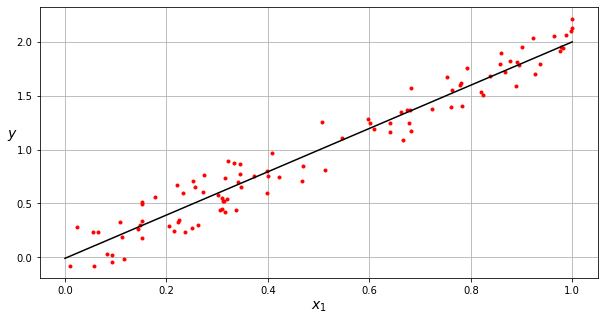

In [8]:
x_new = np.linspace(0, 1, 100)
x_new = x_new.reshape(len(x_new),1)
y_pred = model.predict(x_new)
    

plt.figure(figsize=(10, 5))    
plt.plot(x, y, "r.")
plt.plot(x_new, y_pred, "-k")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

Se nossos Dados seguem uma linha reta, o `Perceptron` será capaz de ajustar-se muito bem. No entanto, se experimentamod em Dados que tem uma distribuição quadrática...

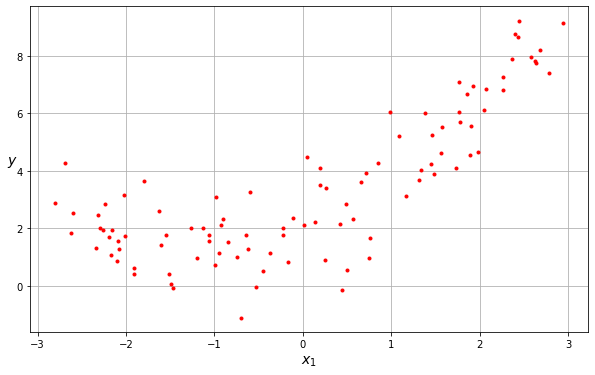

In [12]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

plt.figure(figsize=(10, 6))
plt.plot(x, y, "r.")
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)
plt.grid(True)
plt.show()

In [13]:
model = LinearRegression(inputs=1, outputs=1)
epochs, lr = 50, 0.001
model.fit(x.reshape(len(x),1), y, epochs, lr, log_each=10)

Epoch 10/50 Loss 2.2911883571389473
Epoch 20/50 Loss 1.3569942670364024
Epoch 30/50 Loss 1.2437564899559534
Epoch 40/50 Loss 1.229976494143782
Epoch 50/50 Loss 1.2282994988100489


In [14]:
from matplotlib import animation, rc



rc('animation', html='html5')

def update(i):
    _x_new = np.linspace(-3, 3, 100)
    x_new = _x_new.reshape(len(_x_new),1)
    x_new = np.c_[np.ones(len(x_new)), x_new]
    w = model.ws[i]
    y_pred = model(w, x_new)
    ax.clear()
    ax.plot(x, y, "b.")
    ax.plot(_x_new, y_pred, "-k")
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$y$", rotation=0, fontsize=14)
    ax.set_title(f"Iteración: {i}")
    ax.grid(True)
    ax.axis([-3,3,0,10])
    return ax

fig = plt.figure(dpi=80)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(model.ws), interval=100)
plt.close()

anim

Nosso modelo funciona muito bem para uma tendência Linear e não para este caso ... A seguir vamos melhorar nosso Perceptron para resolver este problema. 

# O Perceptron Multicapa

Como sabemos o PERCEPTRON está inspirado no funcionamento do `Neurônio Biológico`. Não entanto, nossos cérebros estão formados por trilhões (entre 100 e 1000) de conexões entre neurônios. Por tanto, se queremos conseguir Modelos mais "inteligentes"  necessitamos conectar `Perceptrons` em camadas consecutivas para representar distribuições de dados Não-Lineares. Esta arquitetura se conhece com o nome de `Perceptron Multicapa` ou **Multilayer Perceptron** (MLP), a qual é a Arquitetura básica das `REDES NEURAIS`.

![](https://curso-r.github.io/main-deep-learning/slides/img/A-hypothetical-example-of-Multilayer-Perceptron-Network.png)

Nesta figura observamos que o MLP não é mais que uma sequência de `Perceptrones`, as saídas dos quais são entradas para a seguinte camada (... assim até chegar à saída). No caso de um MLP de duas camadas, podemos calcular a saída da primeira camada como:


$$ \mathbf{h}_1 = f_1(\mathbf{w}_1 \cdot \mathbf{x}) $$


onde $\mathbf{h}_1$ é o estado oculto (hidden state) da primeira camada. Observamos, também, que a expressão é a mesma que usamos no modelo `Perceptron`, $\mathbf{w}_1$ são os pesos da primeira capa e $\mathbf{x}$ são as entradas. Se agora consideramos $\mathbf{h}_1$ como as entradas da seguinte camada, podemos encontrar a saída como:


$$ \hat{y} = f_2(\mathbf{w}_2 \cdot \mathbf{h}_1) = f_2(\mathbf{w}_2 \cdot f_1(\mathbf{w}_1 \cdot \mathbf{x})) $$


na qual simplesmente novamente aplicamos a mesma expressão para cada camada, usando as saídas de uma camada como entradas da seguinte de maneira recorrente até chegar à saída.

# Treinando um MLP: o algoritmo de Backpropagation

Uma vez definida a arquitetura do MLP, vamos ver como treiná-lo. Usaremos o mesmo algoritmo que já conhecemos para o `Perceptron`: o algoritmo de `Descenso por Gradiente`. Primeiro necessitamos uma `Função de Perda`, da qual calcularemos a derivada com respeito aos pessos do modelo. Para este exemplo vamos assumir que utilizamos uma função de ativação de tipo `ReLU` na PRIMEIRA CAMADA, $f_1 = max(0, x)$, e uma função de ativação Linear para a SEGUNDA CAMADA já que estamos interessados em usar nosso MLP para regressão. Enquanto a função de Perda, como já sabemos para problemas de regressão usamos o `Erro Quadrático Médio` (MSE):


$$ MSE(\hat{y},y)  = \frac{1}{N} \sum^{N}_{j=1} (\hat{y}^{(j)} - y^{(j)})^2 $$


<font color="orange">OBS:</font>

Usamos funções de ativação não-lineares nas camadas ocultas de um MLP já que uma combinação linear de funções lineares segue sendo uma função linear, o qual significaria que nosso MLP não seria melhor que um `Perceptron` simples. **Por exemplo**, no caso de um MLP com uma capa oculta de apenas um neurônio, uma entrada e uma saída:


$$ \hat{y} = w^1_2 h_1 + w^0_2 = w^1_2 (w^1_1 x_1 + w^0_1) + w^0_2 = w^1 x + w^0 $$




Lembrando o algoritmo `descenso por gradiente`:

1. Calcular a saída do modelo, $\hat{y}$.
2. Calcular a derivada da FUNÇÃO DE PERDA com respeito aos parâmetros do modelo, $\frac{\partial MSE}{\partial w}$.
3. Atualizar os parâmetros, $w \leftarrow w - \eta \frac{\partial MSE}{\partial w}$, onde $\eta$ é o **learning rate**.
4. Repetir até convergir.

No caso do `Perceptron` vimos que podemos calcular a derivada da função de perda com respeito aos pesos da seguinte maneira (usamos regra da cadeia):

$$\frac{\partial MSE}{\partial w} = \frac{\partial MSE}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w} = \frac{2}{N} (\hat{y} - y) x$$

No caso do MLP, esta expressão segue sendo válida porém neste caso só nos serve para achar a derivada da função de perda com respeito a os pesos da última camada. Para calcular a derivada com respeito aos pesos das camadas anteriores temos que utilizar o algoritmo de `backpropagation`, que basicamente consiste em aplicar a `regla da cadeia` da derivada para atrás no MLP até chegar à primeira capa.

$$\frac{\partial MSE}{\partial w_2} = \frac{\partial MSE}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial w_2} = \frac{2}{N} (\hat{y} - y) h_1$$

$$\frac{\partial MSE}{\partial w_1} = \frac{\partial MSE}{\partial h_1} \frac{\partial h_1}{\partial w_1} = \frac{\partial MSE}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial h_1} \frac{\partial h_1}{\partial w_1} = \frac{2}{N} (\hat{y} - y) \mathbf{w}_2 f'_1(\mathbf{w_1} \cdot \mathbf{x}) x$$

e de novo, se temos mais de dois camadas, simplesmente repetimos o raciocínio para cada camada até chegar à primeira.

💡 <font color="pink">Os Frameworks de Redes Neurais, como `Pytorch` ou `Tensorflow`, vão salvando todas as operações que tem lugar numa Rede Neural o qual se chama de `Grafo computacional`, de maneira maneira que quando queremos DERIVAR qualquer valor com respeito aos pesos da Rede simplesmente recorremos o grafo para atrás aplicando a REGRA DA CADEIA (`Backpropagation`). Isto nos permite desenhar arquiteturas de maneira arbitrária sem ter que preocuparmos por calcular todas as derivadas de maneira manual.</font>

A implementação em Python:

In [15]:
def relu(x):
  return np.maximum(0, x)

def reluPrime(x):
  return x > 0


class MLP():
  def __init__(self, D_in, H, D_out):
    self.w1, self.b1 = np.random.normal(loc=0.0,
                                  scale=np.sqrt(2/(D_in+H)),
                                  size=(D_in, H)), np.zeros(H)
    self.w2, self.b2 = np.random.normal(loc=0.0,
                                  scale=np.sqrt(2/(H+D_out)),
                                  size=(H, D_out)), np.zeros(D_out)
    self.ws = []
    self.loss = mse
    self.grad_loss = grad_mse


  def __call__(self, x):
    self.h_pre = np.dot(x, self.w1) + self.b1
    self.h = relu(self.h_pre)
    y_hat = np.dot(self.h, self.w2) + self.b2 
    return y_hat
    

  def fit(self, X, Y, epochs = 100, lr = 0.001, batch_size=None, verbose=True, log_each=1):
    batch_size = len(X) if batch_size == None else batch_size
    batches = len(X) // batch_size
    l = []
    for e in range(1,epochs+1):     
        # Mini-Batch Gradient Descent
        _l = []
        for b in range(batches):
            x = X[b*batch_size:(b+1)*batch_size]
            y = Y[b*batch_size:(b+1)*batch_size]        
            y_pred = self(x) 
            loss = self.loss(y, y_pred)
            _l.append(loss)        
            # Backprop 
            dldy = self.grad_loss(y, y_pred) 
            grad_w2 = np.dot(self.h.T, dldy)
            grad_b2 = dldy.mean(axis=0)
            dldh = np.dot(dldy, self.w2.T)*reluPrime(self.h_pre)      
            grad_w1 = np.dot(x.T, dldh)
            grad_b1 = dldh.mean(axis=0)
            # Update (GD)
            self.w1 = self.w1 - lr * grad_w1
            self.b1 = self.b1 - lr * grad_b1
            self.w2 = self.w2 - lr * grad_w2
            self.b2 = self.b2 - lr * grad_b2
        l.append(np.mean(_l))
        self.ws.append((
            self.w1.copy(),
            self.b1.copy(),
            self.w2.copy(),
            self.b2.copy()
        ))
        if verbose and not e % log_each:
            print(f'Epoch: {e}/{epochs}, Loss: {np.mean(l):.5f}')


  def predict(self, ws, x):
    w1, b1, w2, b2 = ws
    h = relu(np.dot(x, w1) + b1)
    y_hat = np.dot(h, w2) + b2
    return y_hat

In [16]:
model = MLP(D_in=1, H=3, D_out=1)
epochs, lr = 50, 0.0002

model.fit(x, y, epochs, lr, batch_size=1, log_each=10)

Epoch: 10/50, Loss: 7.53159
Epoch: 20/50, Loss: 5.66743
Epoch: 30/50, Loss: 4.18821
Epoch: 40/50, Loss: 3.31454
Epoch: 50/50, Loss: 2.78296


In [17]:
from matplotlib import animation, rc
rc('animation', html='html5')



def update(i):
    _x_new = np.linspace(-3, 3, 100)
    x_new = _x_new.reshape(len(_x_new),1)
    w = model.ws[i]
    y_pred = model.predict(w, x_new)
    ax.clear()
    ax.plot(x, y, "b.")
    ax.plot(_x_new, y_pred, "-k")
    ax.set_xlabel("$x_1$", fontsize=14)
    ax.set_ylabel("$y$", rotation=0, fontsize=14)
    ax.set_title(f"Iteración: {i}")
    ax.grid(True)
    ax.axis([-3,3,0,10])
    return ax

fig = plt.figure(dpi=80)
ax = plt.subplot(1,1,1)
anim = animation.FuncAnimation(fig, update, frames=len(model.ws), interval=100)
plt.close()

anim

Nosso modelo agora é capaz de adaptar-se melhor aos Dados, resolvendo a limitação do Perceptron. Quantas mais camadas e neurônios usemos por camadas, melhor será o modelo de representar os Dados. Isto, no entanto pode provocar o pronblemas conhecido como `Overfitting`. 

Podemos explorar mais este modelo, tipo: mudando as camadas, Dados, Função de Ativação, etc, na seguinte web: https://playground.tensorflow.org/